In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)
from sklearn.metrics import f1_score
from sklearn.metrics.cluster import rand_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.model_selection import train_test_split

from sklearn import datasets, metrics, model_selection

#from data import *
from helpers import *


In [34]:
def proportional_train_test_split(X, y, test_size=0.2, random_state=0):
    #find all y==1 and y==0
    X['y'] = y.copy()
    X_1 = X[X['y']==1]
    y_1 = X_1['y']
    X_1 = X_1.drop(['y'],axis=1)
    X_not1 = X[X['y']!=1]
    y_not1 = X_not1['y']
    X_not1 = X_not1.drop(['y'],axis=1)
    
    #split in each sample
    X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=test_size, random_state=random_state)
    X_not1_train, X_not1_test, y_not1_train, y_not1_test = train_test_split(X_not1, y_not1, test_size=test_size, random_state=random_state)
    
    #merge them together
    X_final_train = X_1_train.append(X_not1_train, ignore_index = True)
    X_final_test = X_1_test.append(X_not1_test, ignore_index = True)
    y_final_train = y_1_train.append(y_not1_train, ignore_index = True)
    y_final_test = y_1_test.append(y_not1_test, ignore_index = True)
    
    return X_final_train, X_final_test, y_final_train, y_final_test



In [35]:
def merge_files(files):
    init = files[0]
    files_ = files[1::]
    
    X,y = preprocess(init,columns)
    for file in files_:
        X1,y1 = preprocess(file,columns)
        X = X.append(X1, ignore_index = True)
        y = y.append(y1, ignore_index = True)
    return X,y

In [36]:
files = [
#         '../labeled_dataset/GL53_UP_1A.csv',
#         '../labeled_dataset/GL53_UP_2A.csv',
         '../labeled_dataset/GL53_UP_3A.csv',
         '../labeled_dataset/GL55_DN_3A.csv',
         '../labeled_dataset/GL57_DN_3A.csv',
         '../labeled_dataset/GL57_DN_2A.csv',
#         '../labeled_dataset/GL58_UP_1A.csv',
         '../labeled_dataset/GL58_UP_2A.csv',
         '../labeled_dataset/GL58_UP_3A.csv',
         '../labeled_dataset/GL59_DN_1A.csv',
#         '../labeled_dataset/GL59_DN_2A.csv',
         '../labeled_dataset/GL59_DN_3A.csv']

train_files = ['../labeled_dataset/GL59_DN_2A.csv','../labeled_dataset/GL53_UP_2A.csv','../labeled_dataset/GL53_UP_1A.csv','../labeled_dataset/GL58_UP_1A.csv']
columns=['B530-H', 'B530-A','B675-H','B572-H','Width']
#columns=['FSC-H','SSC-H','B530-H','B572-H','B675-H','FSC-A','SSC-A','B530-A','B572-A','B675-A','Width']

X,y = merge_files(train_files)  


../labeled_dataset/GL59_DN_2A.csv
../labeled_dataset/GL53_UP_2A.csv
../labeled_dataset/GL53_UP_1A.csv
../labeled_dataset/GL58_UP_1A.csv


In [37]:
X.shape

(28204, 5)

In [38]:
X_train, X_test, y_train, y_test = proportional_train_test_split(X,y)

In [39]:
kfold_cv = model_selection.KFold(n_splits=10, shuffle=True, random_state=0)

### Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [41]:
# Example of a cross-validation scenario 
results = model_selection.cross_val_score(DecisionTreeClassifier(random_state=0), X_train, y_train, cv=kfold_cv, scoring='accuracy')
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))
results = model_selection.cross_val_score(DecisionTreeClassifier(random_state=0), X_train, y_train, cv=kfold_cv, scoring='balanced_accuracy')
print("Balanced Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))
results = model_selection.cross_val_score(DecisionTreeClassifier(random_state=0), X_train, y_train, cv=kfold_cv, scoring='f1')
print("F1: %.3f (%.3f)" % (results.mean(), results.std()))
results = model_selection.cross_val_score(DecisionTreeClassifier(random_state=0), X_train, y_train, cv=kfold_cv, scoring='roc_auc')
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))


# Example for a training-test split
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy: %.3f" % (metrics.accuracy_score(y_test, y_pred)))
print("Balanced Accuracy: %.3f" % (metrics.balanced_accuracy_score(y_test, y_pred)))
print("F1: %.3f" % (metrics.f1_score(y_test, y_pred)))
print("AUC: %.3f" % (metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.843 (0.010)
Balanced Accuracy: 0.842 (0.010)
F1: 0.830 (0.012)
AUC: 0.842 (0.010)
Accuracy: 0.849
Balanced Accuracy: 0.847
F1: 0.833
AUC: 0.847


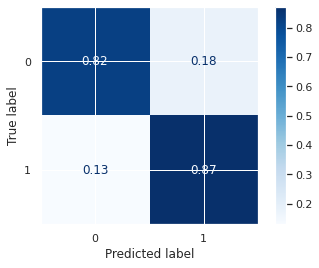

In [42]:
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
metrics.plot_confusion_matrix(model, X_test, y_test, display_labels=np.arange(0, 2), cmap=plt.cm.Blues, normalize='true');

../labeled_dataset/GL53_UP_3A.csv
Accuracy: 0.811
Balanced Accuracy: 0.822
F1: 0.803
 
../labeled_dataset/GL55_DN_3A.csv
Accuracy: 0.216
Balanced Accuracy: 0.256
F1: 0.354
 
../labeled_dataset/GL57_DN_3A.csv
Accuracy: 0.807
Balanced Accuracy: 0.827
F1: 0.757
 
../labeled_dataset/GL57_DN_2A.csv
Accuracy: 0.800
Balanced Accuracy: 0.802
F1: 0.784
 
../labeled_dataset/GL58_UP_2A.csv
Accuracy: 0.809
Balanced Accuracy: 0.824
F1: 0.763
 
../labeled_dataset/GL58_UP_3A.csv
Accuracy: 0.782
Balanced Accuracy: 0.815
F1: 0.724
 
../labeled_dataset/GL59_DN_1A.csv
Accuracy: 0.820
Balanced Accuracy: 0.840
F1: 0.790
 
../labeled_dataset/GL59_DN_3A.csv
Accuracy: 0.825
Balanced Accuracy: 0.852
F1: 0.783
 


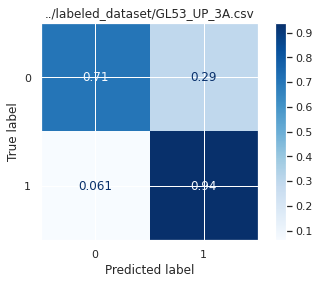

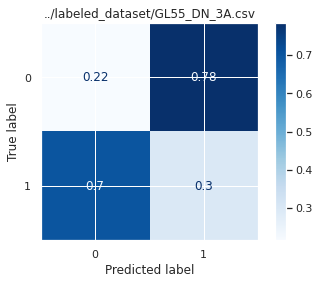

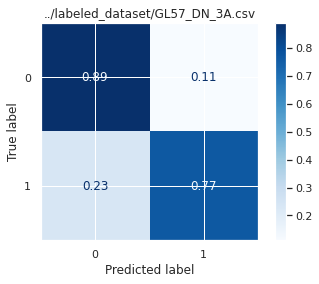

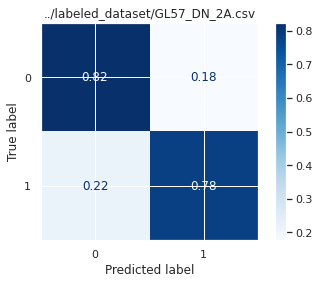

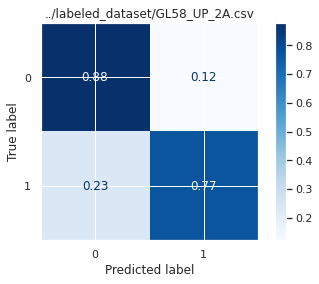

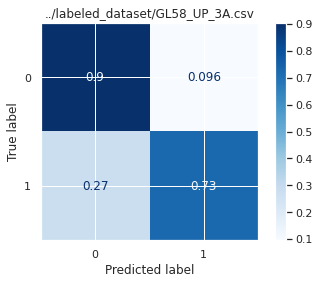

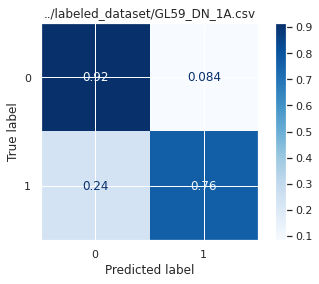

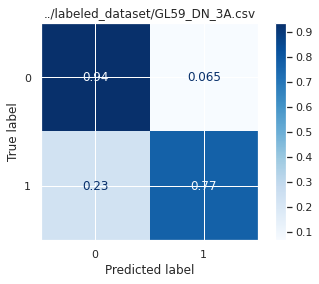

In [43]:
for file in files:
    
    X_file,y_file = preprocess(file,columns)

    y_pred_file = model.predict(X_file)
    disp = metrics.plot_confusion_matrix(model, X_file, y_file, display_labels=np.arange(0, 2), cmap=plt.cm.Blues, normalize='true');
    disp.ax_.set_title(file)
    print("Accuracy: %.3f" % (metrics.accuracy_score(y_file, y_pred_file)))
    print("Balanced Accuracy: %.3f" % (metrics.balanced_accuracy_score(y_file, y_pred_file)))
    print("F1: %.3f" % (metrics.f1_score(y_file, y_pred_file)))
    print(" ")
    

### Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, random_state= 0)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [45]:
forest.feature_importances_

array([0.19779195, 0.23850473, 0.28696221, 0.16206437, 0.11467675])

In [46]:
forest.predict(X_test)

array([1, 1, 1, ..., 2, 2, 2])

In [47]:
forest.predict_proba(X_test)

array([[1. , 0. ],
       [1. , 0. ],
       [0.9, 0.1],
       ...,
       [0. , 1. ],
       [0. , 1. ],
       [0.3, 0.7]])

In [48]:
# Example of a cross-validation scenario 
results = model_selection.cross_val_score(RandomForestClassifier(random_state=0), X_train, y_train, cv=kfold_cv, scoring='accuracy')
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))
results = model_selection.cross_val_score(RandomForestClassifier(random_state=0), X_train, y_train, cv=kfold_cv, scoring='balanced_accuracy')
print("Balanced Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))
results = model_selection.cross_val_score(RandomForestClassifier(random_state=0), X_train, y_train, cv=kfold_cv, scoring='f1')
print("F1: %.3f (%.3f)" % (results.mean(), results.std()))
results = model_selection.cross_val_score(RandomForestClassifier(random_state=0), X_train, y_train, cv=kfold_cv, scoring='roc_auc')
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))


# Example for a training-test split
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy: %.3f" % (metrics.accuracy_score(y_test, y_pred)))
print("Balanced Accuracy: %.3f" % (metrics.balanced_accuracy_score(y_test, y_pred)))
print("F1: %.3f" % (metrics.f1_score(y_test, y_pred)))
print("AUC: %.3f" % (metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.882 (0.008)
Balanced Accuracy: 0.880 (0.008)
F1: 0.870 (0.009)
AUC: 0.958 (0.004)
Accuracy: 0.879
Balanced Accuracy: 0.877
F1: 0.867
AUC: 0.877


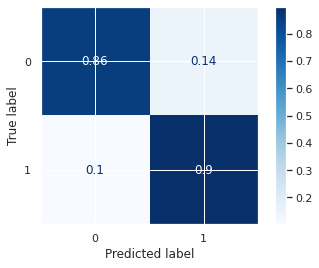

In [49]:
metrics.plot_confusion_matrix(model, X_test, y_test, display_labels=np.arange(0, 2), cmap=plt.cm.Blues, normalize='true');

../labeled_dataset/GL53_UP_3A.csv
Accuracy: 0.828
Balanced Accuracy: 0.839
F1: 0.819
../labeled_dataset/GL55_DN_3A.csv
Accuracy: 0.160
Balanced Accuracy: 0.107
F1: 0.276
../labeled_dataset/GL57_DN_3A.csv
Accuracy: 0.841
Balanced Accuracy: 0.858
F1: 0.795
../labeled_dataset/GL57_DN_2A.csv
Accuracy: 0.856
Balanced Accuracy: 0.859
F1: 0.844
../labeled_dataset/GL58_UP_2A.csv
Accuracy: 0.844
Balanced Accuracy: 0.863
F1: 0.807
../labeled_dataset/GL58_UP_3A.csv
Accuracy: 0.800
Balanced Accuracy: 0.832
F1: 0.744
../labeled_dataset/GL59_DN_1A.csv
Accuracy: 0.863
Balanced Accuracy: 0.881
F1: 0.836
../labeled_dataset/GL59_DN_3A.csv
Accuracy: 0.856
Balanced Accuracy: 0.879
F1: 0.817


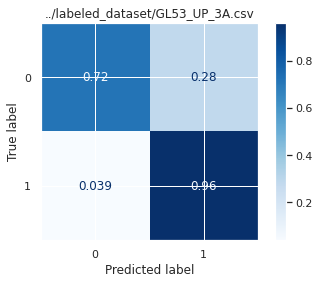

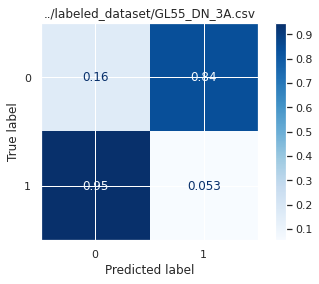

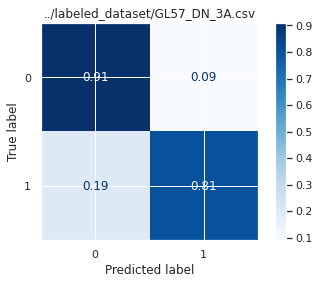

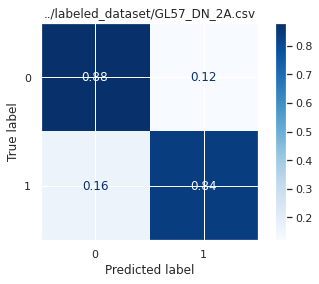

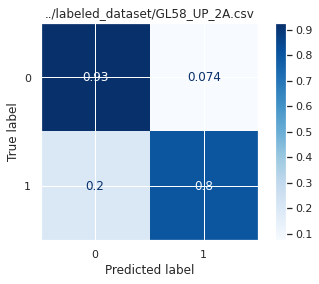

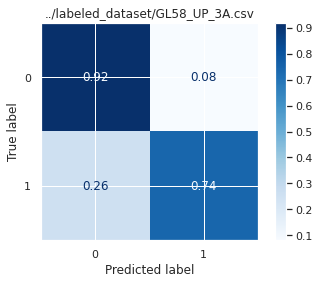

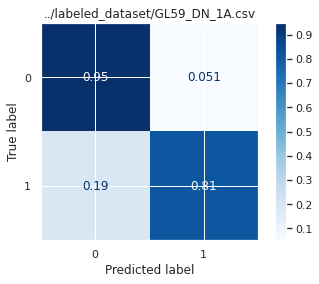

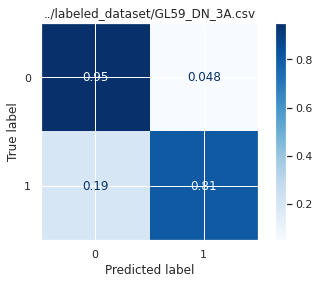

In [50]:
for file in files:
    
    X_file,y_file = preprocess(file,columns)

    y_pred_file = model.predict(X_file)
    disp = metrics.plot_confusion_matrix(model, X_file, y_file, display_labels=np.arange(0, 2), cmap=plt.cm.Blues, normalize='true');
    disp.ax_.set_title(file)
    print("Accuracy: %.3f" % (metrics.accuracy_score(y_file, y_pred_file)))
    print("Balanced Accuracy: %.3f" % (metrics.balanced_accuracy_score(y_file, y_pred_file)))
    print("F1: %.3f" % (metrics.f1_score(y_file, y_pred_file)))
    

../labeled_dataset/GL55_DN_3A.csv
Accuracy: 0.160
Balanced Accuracy: 0.107
F1: 0.276
AUC: 0.877
 


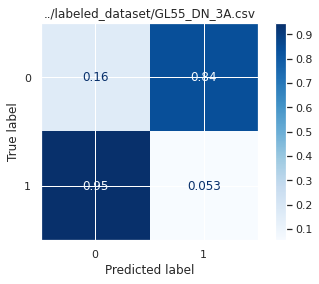

In [75]:
file = '../labeled_dataset/GL55_DN_3A.csv'
X_file,y_file = preprocess(file,columns)
y_pred_file = model.predict(X_file)
disp = metrics.plot_confusion_matrix(model, X_file, y_file, display_labels=np.arange(0, 2), cmap=plt.cm.Blues, normalize='true');
disp.ax_.set_title(file)
print("Accuracy: %.3f" % (metrics.accuracy_score(y_file, y_pred_file)))
print("Balanced Accuracy: %.3f" % (metrics.balanced_accuracy_score(y_file, y_pred_file)))
print("F1: %.3f" % (metrics.f1_score(y_file, y_pred_file)))
print("AUC: %.3f" % (metrics.roc_auc_score(y_test, y_pred)))
print(" ")
    

<AxesSubplot:xlabel='B530-H', ylabel='B572-H'>

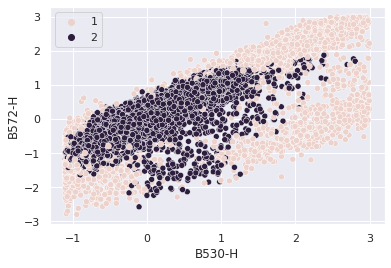

In [67]:
sns.scatterplot(data=X_file, x="B530-H", y="B572-H", hue=y_pred_file)

In [79]:
len(list(filter(lambda x: x ==1, y_pred_file)))

14344

<AxesSubplot:xlabel='B530-H', ylabel='B572-H'>

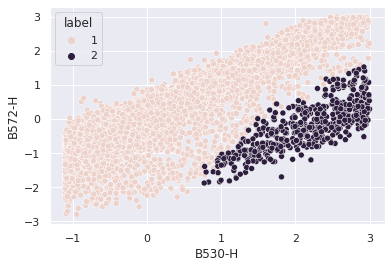

In [68]:
sns.scatterplot(data=X_file, x="B530-H", y="B572-H", hue=y_file)

# SVM

In [29]:
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['balanced_accuracy', 'f1','roc_auc']

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print() 
    
    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s' % score
    )
    clf.fit(X_train, y_train)
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for balanced_accuracy



KeyboardInterrupt: 

In [ ]:
from sklearn import svm
svmsvc = svm.SVC(max_iter=1000, random_state=0)
svmsvc.fit(X_train, y_train)

In [21]:
# Example of a cross-validation scenario 
results = model_selection.cross_val_score(svm.SVC(max_iter=1000, random_state=0), X_train, y_train, cv=kfold_cv, scoring='accuracy')
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))
results = model_selection.cross_val_score(svm.SVC(max_iter=1000, random_state=0), X_train, y_train, cv=kfold_cv, scoring='balanced_accuracy')
print("Balanced Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))
results = model_selection.cross_val_score(svm.SVC(max_iter=1000, random_state=0), X_train, y_train, cv=kfold_cv, scoring='f1')
print("F1: %.3f (%.3f)" % (results.mean(), results.std()))
results = model_selection.cross_val_score(svm.SVC(max_iter=1000, random_state=0), X_train, y_train, cv=kfold_cv, scoring='roc_auc')
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

# Example for a training-test split
model = svm.SVC(max_iter=1000, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy: %.3f" % (metrics.accuracy_score(y_test, y_pred)))
print("Balanced Accuracy: %.3f" % (metrics.balanced_accuracy_score(y_test, y_pred)))
print("F1: %.3f" % (metrics.f1_score(y_test, y_pred)))
print("AUC: %.3f" % (metrics.roc_auc_score(y_test, y_pred)))

/home/mika/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/mika/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/mika/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/mika/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

Accuracy: 0.744 (0.050)


/home/mika/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/mika/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/mika/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/mika/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

Balanced Accuracy: 0.745 (0.045)


/home/mika/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/mika/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/mika/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/mika/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

F1: 0.732 (0.036)


/home/mika/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/mika/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/mika/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/mika/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

AUC: 0.819 (0.037)


/home/mika/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Accuracy: 0.730
Balanced Accuracy: 0.730
F1: 0.714
AUC: 0.730


../labeled_dataset/GL53_UP_1A.csv
Accuracy: 0.749
Balanced Accuracy: 0.757
F1: 0.769
../labeled_dataset/GL53_UP_2A.csv
Accuracy: 0.622
Balanced Accuracy: 0.623
F1: 0.629
../labeled_dataset/GL53_UP_3A.csv
Accuracy: 0.842
Balanced Accuracy: 0.847
F1: 0.845
../labeled_dataset/GL55_DN_3A.csv
Accuracy: 0.496
Balanced Accuracy: 0.340
F1: 0.663
../labeled_dataset/GL57_DN_3A.csv
Accuracy: 0.826
Balanced Accuracy: 0.861
F1: 0.790
../labeled_dataset/GL57_DN_2A.csv
Accuracy: 0.800
Balanced Accuracy: 0.810
F1: 0.798
../labeled_dataset/GL58_UP_1A.csv
Accuracy: 0.649
Balanced Accuracy: 0.659
F1: 0.674
../labeled_dataset/GL58_UP_2A.csv
Accuracy: 0.790
Balanced Accuracy: 0.830
F1: 0.763
../labeled_dataset/GL58_UP_3A.csv
Accuracy: 0.802
Balanced Accuracy: 0.843
F1: 0.753
../labeled_dataset/GL59_DN_1A.csv
Accuracy: 0.809
Balanced Accuracy: 0.842
F1: 0.788
../labeled_dataset/GL59_DN_2A.csv
Accuracy: 0.808
Balanced Accuracy: 0.838
F1: 0.769
../labeled_dataset/GL59_DN_3A.csv
Accuracy: 0.826
Balanced Accura

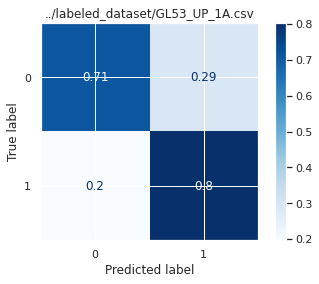

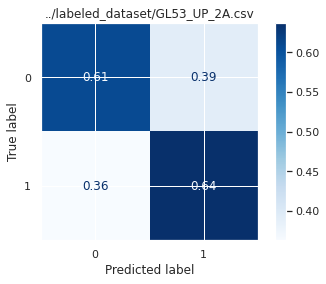

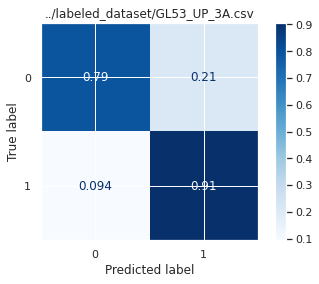

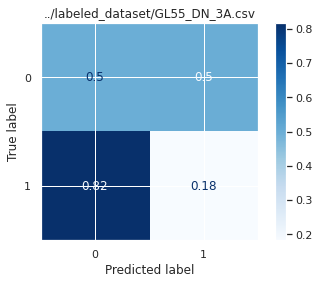

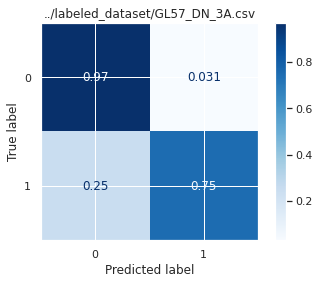

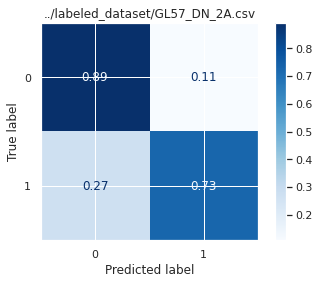

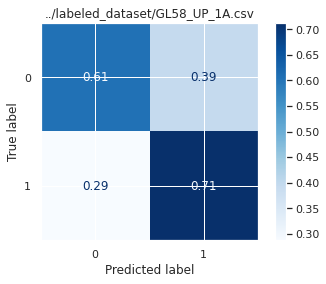

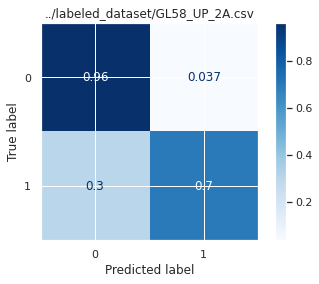

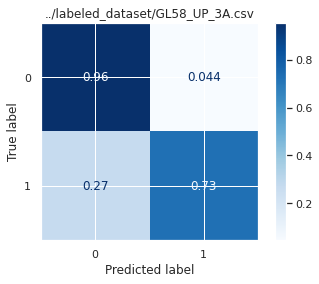

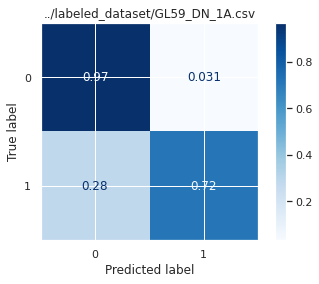

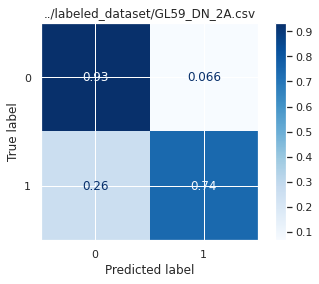

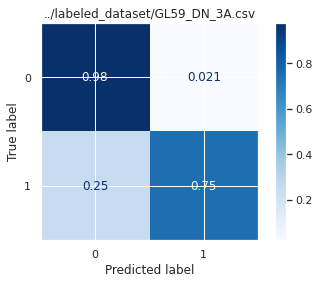

In [22]:
for file in files:
    
    X_file,y_file = preprocess(file,columns)

    y_pred_file = model.predict(X_file)
    disp = metrics.plot_confusion_matrix(model, X_file, y_file, display_labels=np.arange(0, 2), cmap=plt.cm.Blues, normalize='true');
    disp.ax_.set_title(file)
    print("Accuracy: %.3f" % (metrics.accuracy_score(y_file, y_pred_file)))
    print("Balanced Accuracy: %.3f" % (metrics.balanced_accuracy_score(y_file, y_pred_file)))
    print("F1: %.3f" % (metrics.f1_score(y_file, y_pred_file)))
    

<AxesSubplot:xlabel='B530-H', ylabel='B572-H'>

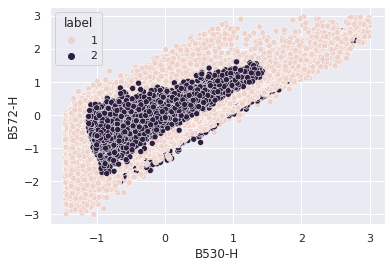

In [23]:
sns.scatterplot(data=X, x="B530-H", y="B572-H", hue=y)